#### Scraping the given sites and classifying them using imported SVM Pipeline

In [119]:
import pickle

In [120]:
text_classifier = pickle.load(open('model.pkl', 'rb'))
label_encoder_mapping = pickle.load(open('label_encoder_mapping.pkl', 'rb'))

In [121]:
label_encoder_mapping

{0: 'Adult',
 1: 'Business/Corporate',
 2: 'Computers and Technology',
 3: 'E-Commerce',
 4: 'Education',
 5: 'Food',
 6: 'Forums',
 7: 'Games',
 8: 'Health and Fitness',
 9: 'Law and Government',
 10: 'News',
 11: 'Photography',
 12: 'Social Networking and Messaging',
 13: 'Sports',
 14: 'Streaming Services',
 15: 'Travel'}

In [122]:
def predict(text):
    return label_encoder_mapping[text_classifier.predict([text])[0]]

In [123]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [124]:
sites = [
"https://nsktu.ac.in/",
"https://www.etsy.com",
"https://magicpin.in",
"https://www.sportskeeda.com",
"https://www.cricbuzz.com",
"https://www.iis.net/",
"https://www.edureka.co/",
"https://www.helpmecovid.com",
"https://www.healthifyme.com/"
]

In [125]:
sites_content = []
for site in sites:
    driver = webdriver.Chrome("/usr/bin/chromedriver")
    driver.get(site)
    el = driver.find_element(By.TAG_NAME, 'body')
    sites_content.append(el.text)
    driver.close()

/tmp/ipykernel_321677/3644859717.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/usr/bin/chromedriver")


In [126]:
predictions = [predict(i) for i in sites_content]
for i in range(len(predictions)):
    print(sites[i]," : ", predictions[i])

https://nsktu.ac.in/  :  Education
https://www.etsy.com  :  E-Commerce
https://magicpin.in  :  E-Commerce
https://www.sportskeeda.com  :  Sports
https://www.cricbuzz.com  :  Sports
https://www.iis.net/  :  Computers and Technology
https://www.edureka.co/  :  Computers and Technology
https://www.helpmecovid.com  :  News
https://www.healthifyme.com/  :  Health and Fitness


In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'CountPlot')

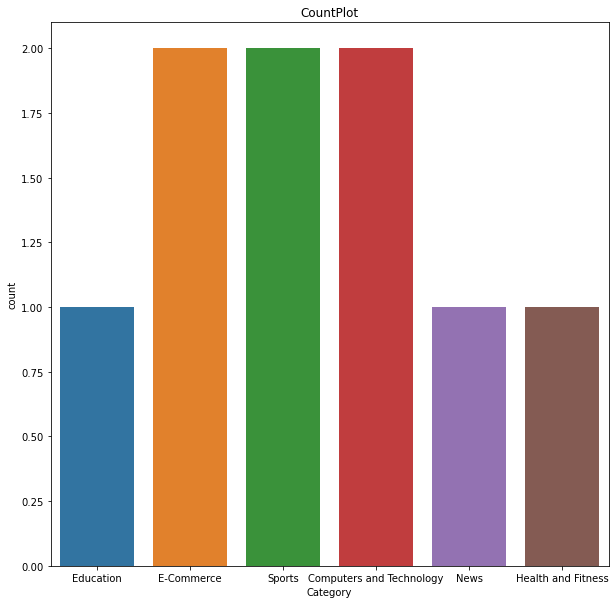

In [128]:
plt.figure(figsize = (10, 10))
sns.countplot(x=predictions)
plt.xlabel('Category')
plt.title('CountPlot')


#### Editing the Categories as per the given assignment

In [129]:
categories = label_encoder_mapping.values()
categories = list(categories)
categories

['Adult',
 'Business/Corporate',
 'Computers and Technology',
 'E-Commerce',
 'Education',
 'Food',
 'Forums',
 'Games',
 'Health and Fitness',
 'Law and Government',
 'News',
 'Photography',
 'Social Networking and Messaging',
 'Sports',
 'Streaming Services',
 'Travel']

Converting the dataset categories

In [130]:
new_categories = {
    0:'Health',
    1:'Tech',
    2:"Tech",
    3:"Tech",
    4:"Education",
    5:"Health",
    6:"Tech",
    7:"Tech",
    8:"Health",
    9:"Health",
    10:"Health",
    11:"Tech",
    12:"Tech",
    13:"Sport",
    14:"Tech",
    15:"Health"
}

In [131]:
def classify(text):
    return new_categories[text_classifier.predict([text])[0]]

In [132]:
classifications = [classify(i) for i in sites_content]
for i in range(len(classifications)):
    print(sites[i]," : ", classifications[i])

https://nsktu.ac.in/  :  Education
https://www.etsy.com  :  Tech
https://magicpin.in  :  Tech
https://www.sportskeeda.com  :  Sport
https://www.cricbuzz.com  :  Sport
https://www.iis.net/  :  Tech
https://www.edureka.co/  :  Tech
https://www.helpmecovid.com  :  Health
https://www.healthifyme.com/  :  Health


Text(0.5, 1.0, 'CountPlot')

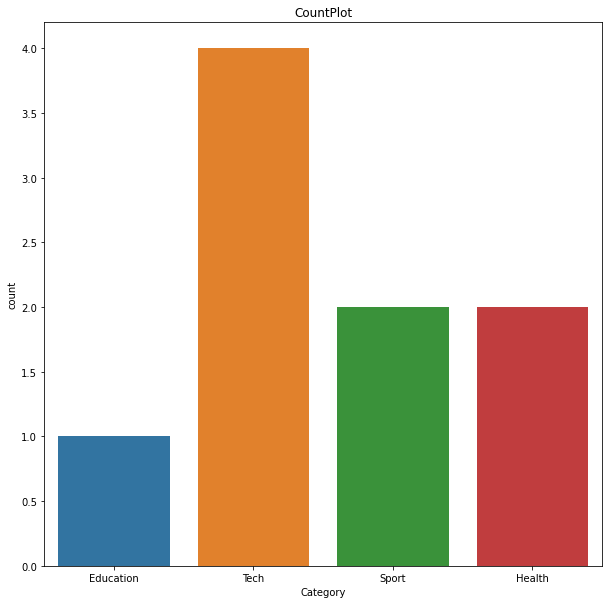

In [133]:
plt.figure(figsize = (10, 10))
sns.countplot(x=classifications)
plt.xlabel('Category')
plt.title('CountPlot')
